*** 
# Veronica's Capstone Scratch Pad
***

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle 

from sklearn.metrics import mean_squared_error, explained_variance_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt
from datetime import datetime

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

# plt.rc('figure', figsize=(13, 7))
# plt.rc('axes.spines', top=False, right=False)
# plt.rc('font', size=13)

# visualization settings
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')
sns.set_palette('tab20')
# pal = sns.set_palette('tab20')

# Acquire

In [2]:
#Acquire Job Market Data with Education
df_education = pd.read_csv('labor_market_data.csv')  

In [3]:
#Acquire Job Market Data with Race Data
df_race = pd.read_csv('LaborMarketWRace.csv')

In [4]:
#Acquire Job Market Data with Gender Data
df_age = pd.read_csv('LaborMarketWAge.csv')

# Prepare

In [5]:
#Check out data with education
df_education.head()

,periodicity,periodicity_label.value,seasonadj,seasonadj_label.value,geo_level,geo_level_label.value,geography,geography_label.value,ind_level,industry,...,FrmJbLs,EarnBeg,Payroll,sEmp,sHirA,sSep,sFrmJbGn,sFrmJbLs,sEarnBeg,sPayroll
0,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,359.0,2161.0,NaN,1,1,1,1,1,1,5
1,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,242.0,2514.0,NaN,1,1,1,1,1,1,5
2,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,194.0,2770.0,NaN,1,1,1,1,1,1,5
3,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,102.0,3531.0,NaN,1,1,1,1,1,1,5
4,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,193.0,1529.0,NaN,1,1,1,1,1,1,5


In [6]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20580 entries, 0 to 20579
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   periodicity              20580 non-null  object 
 1   periodicity_label.value  20580 non-null  object 
 2   seasonadj                20580 non-null  object 
 3   seasonadj_label.value    20580 non-null  object 
 4   geo_level                20580 non-null  object 
 5   geo_level_label.value    20580 non-null  object 
 6   geography                20580 non-null  int64  
 7   geography_label.value    20580 non-null  object 
 8   ind_level                20580 non-null  int64  
 9   industry                 20580 non-null  int64  
 10  industry_label.value     20580 non-null  object 
 11  ownercode                20580 non-null  object 
 12  ownercode_label.value    20580 non-null  object 
 13  sex                      20580 non-null  int64  
 14  sex_label.value       

In [7]:
df_education.shape

(20580, 43)

In [8]:
df_education.FrmJbGn.max()

30373.0

In [9]:
df_education = df_education.rename(columns={"FrmJbGn": "job_gain", "FrmJbLs": "job_loss", "HirA": "hires", "Sep":"separations"}, errors="raise")

In [10]:
df_education = df_education.rename(columns={"periodicity_label.value": "periodicity_label", "seasonadj_label.value": "seasonadj_label",
                        "geo_level_label.value": "geo_level_label", "geography_label.value":"geography_label",
                        "industry_label.value":"industry_label",
                        "ownercode_label.value": "ownercode_label", "sex_label.value": "sex_label",
                        "agegrp_label.value" : "agegrp_label", "race_label.value": "race_label",
                        "ethnicity_label.value":"ethnicity_label", "education_label.value": "education_label",
                        "firmage_label.value":"firmage_label", "firmsize_label.value": "firmsize_label"
                        }, errors="raise")

In [11]:
df_education

,periodicity,periodicity_label,seasonadj,seasonadj_label,geo_level,geo_level_label,geography,geography_label,ind_level,industry,...,job_loss,EarnBeg,Payroll,sEmp,sHirA,sSep,sFrmJbGn,sFrmJbLs,sEarnBeg,sPayroll
0,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,359.0,2161.0,NaN,1,1,1,1,1,1,5
1,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,242.0,2514.0,NaN,1,1,1,1,1,1,5
2,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,194.0,2770.0,NaN,1,1,1,1,1,1,5
3,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,102.0,3531.0,NaN,1,1,1,1,1,1,5
4,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,193.0,1529.0,NaN,1,1,1,1,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20575,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,928,...,NaN,3139.0,NaN,1,1,-1,-1,-1,1,5
20576,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,928,...,NaN,3563.0,NaN,1,1,-1,-1,-1,1,5
20577,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,928,...,NaN,3894.0,NaN,1,1,-1,-1,-1,1,5
20578,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,928,...,NaN,5058.0,NaN,1,1,-1,-1,-1,1,5


In [12]:
col_to_drop = ['sEmp', 'sSep','firmage','firmsize','periodicity','periodicity_label',
               'seasonadj_label', 'geo_level', 'geo_level_label',
               'geography', 'geography_label', 'ind_level', 'sex', 'ownercode',
              'sHirA','sFrmJbGn','sFrmJbLs','sEarnBeg','sPayroll','seasonadj',
              'agegrp','agegrp_label','race','race_label','ethnicity','ethnicity_label','firmage_label',
               'firmsize_label']

# Drop the list of columns:
df_education = df_education.drop(columns=col_to_drop)

In [13]:
df_education.describe()

,industry,year,quarter,Emp,hires,separations,job_gain,job_loss,EarnBeg,Payroll
count,20580.000000,20580.000000,20580.000000,20529.000000,20449.000000,19424.000000,19549.000000,19549.000000,20557.000000,0.0
mean,478.224490,2018.142857,2.428571,12215.271031,2248.242310,2246.736203,702.034477,679.702747,4499.461059,NaN
std,199.710734,1.520867,1.136917,24768.661095,6305.020944,6229.920308,1629.405218,1570.128481,3080.976198,NaN
min,111.000000,2016.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,NaN
25%,327.000000,2017.000000,1.000000,1218.000000,181.000000,178.000000,65.000000,60.000000,2561.000000,NaN
50%,481.500000,2018.000000,2.000000,4410.000000,574.000000,588.500000,215.000000,211.000000,3813.000000,NaN
75%,541.000000,2019.000000,3.000000,11793.000000,1718.000000,1739.250000,622.000000,609.000000,5414.000000,NaN
max,928.000000,2021.000000,4.000000,282658.000000,115464.000000,115605.000000,30373.000000,36372.000000,59720.000000,NaN


In [14]:
df_education.columns

Index(['industry', 'industry_label', 'ownercode_label', 'sex_label',
       'education', 'education_label', 'year', 'quarter', 'Emp', 'hires',
       'separations', 'job_gain', 'job_loss', 'EarnBeg', 'Payroll'],
      dtype='object')

In [15]:
df_education.sex_label.value_counts()

Female    10290
Male      10290
Name: sex_label, dtype: int64

In [16]:
#Look for nulls
df_education.isna().sum()

industry               0
industry_label         0
ownercode_label        0
sex_label              0
education              0
education_label        0
year                   0
quarter                0
Emp                   51
hires                131
separations         1156
job_gain            1031
job_loss            1031
EarnBeg               23
Payroll            20580
dtype: int64

In [17]:
df_education.drop(columns=['Payroll'],inplace=True )

In [18]:
df_education.isna().sum()

industry              0
industry_label        0
ownercode_label       0
sex_label             0
education             0
education_label       0
year                  0
quarter               0
Emp                  51
hires               131
separations        1156
job_gain           1031
job_loss           1031
EarnBeg              23
dtype: int64

In [19]:
df_education[df_education.job_gain.isna()].industry.nunique()

98

In [20]:
df_education[df_education.job_gain.isna()].industry.value_counts()

482    61
541    10
532    10
531    10
525    10
       ..
336    10
335    10
334    10
333    10
928    10
Name: industry, Length: 98, dtype: int64

In [21]:
df_education[df_education.Emp.isna()].industry.nunique()

1

In [22]:
df_education[df_education.Emp.isna()].industry.value_counts()

482    51
Name: industry, dtype: int64

In [23]:
#Dropping all nulls since largest quantity is 62 for Rail Industry and the others are 10 nulls per industry
df_education.dropna(inplace=True)

In [24]:
df_education.isna().sum()

industry           0
industry_label     0
ownercode_label    0
sex_label          0
education          0
education_label    0
year               0
quarter            0
Emp                0
hires              0
separations        0
job_gain           0
job_loss           0
EarnBeg            0
dtype: int64

In [25]:
df_education.head()

,industry,industry_label,ownercode_label,sex_label,education,education_label,year,quarter,Emp,hires,separations,job_gain,job_loss,EarnBeg
0,111,Crop Production,State and local government plus private ownership,Male,E1,Less than high school,2016,1,5650.0,1102.0,945.0,517.0,359.0,2161.0
1,111,Crop Production,State and local government plus private ownership,Male,E2,"High school or equivalent, no college",2016,1,3355.0,722.0,628.0,336.0,242.0,2514.0
2,111,Crop Production,State and local government plus private ownership,Male,E3,Some college or Associate degree,2016,1,2754.0,612.0,501.0,305.0,194.0,2770.0
3,111,Crop Production,State and local government plus private ownership,Male,E4,Bachelor's degree or advanced degree,2016,1,1430.0,303.0,241.0,164.0,102.0,3531.0
4,111,Crop Production,State and local government plus private ownership,Male,E5,Educational attainment not available (workers ...,2016,1,1449.0,800.0,617.0,376.0,193.0,1529.0


In [26]:
#Taking a look at the dataset with race data
df_race.head()

,periodicity,periodicity_label.value,seasonadj,seasonadj_label.value,geo_level,geo_level_label.value,geography,geography_label.value,ind_level,industry,...,Payroll,sEmp,sHirA,sSep,sFrmJbGn,sFrmJbLs,sFrmJbC,sHirAEndReplR,sEarnBeg,sPayroll
0,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,NaN,1,1,1,1,1,1,6,1,5
1,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,NaN,1,1,1,1,1,1,6,1,5
2,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,NaN,1,1,1,1,1,1,6,1,5
3,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,NaN,1,1,1,1,1,1,6,1,5
4,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,NaN,1,1,1,1,1,1,6,1,5


In [27]:
df_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24696 entries, 0 to 24695
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   periodicity              24696 non-null  object 
 1   periodicity_label.value  24696 non-null  object 
 2   seasonadj                24696 non-null  object 
 3   seasonadj_label.value    24696 non-null  object 
 4   geo_level                24696 non-null  object 
 5   geo_level_label.value    24696 non-null  object 
 6   geography                24696 non-null  int64  
 7   geography_label.value    24696 non-null  object 
 8   ind_level                24696 non-null  int64  
 9   industry                 24696 non-null  int64  
 10  industry_label.value     24696 non-null  object 
 11  ownercode                24696 non-null  object 
 12  ownercode_label.value    24696 non-null  object 
 13  sex                      24696 non-null  int64  
 14  sex_label.value       

In [28]:
df_race.describe()

,geography,ind_level,industry,sex,firmage,firmsize,year,quarter,Emp,HirA,...,Payroll,sEmp,sHirA,sSep,sFrmJbGn,sFrmJbLs,sFrmJbC,sHirAEndReplR,sEarnBeg,sPayroll
count,24696.0,24696.0,24696.000000,24696.0,24696.0,24696.0,24696.000000,24696.000000,24251.000000,23207.000000,...,0.0,24696.000000,24696.000000,24696.000000,24696.000000,24696.000000,24696.000000,24696.000000,24696.000000,24696.0
mean,48.0,3.0,478.224490,0.0,0.0,0.0,2018.142857,2.428571,10340.468228,1980.961348,...,NaN,1.072076,1.241173,1.145287,0.977162,0.977162,0.977162,5.568837,1.059929,5.0
std,0.0,0.0,199.709926,0.0,0.0,0.0,1.520861,1.136912,39185.344938,9175.590240,...,NaN,0.532092,0.952136,1.063726,0.692514,0.692514,0.692514,1.498450,0.485935,0.0
min,48.0,3.0,111.000000,0.0,0.0,0.0,2016.000000,1.000000,0.000000,0.000000,...,NaN,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,5.0
25%,48.0,3.0,327.000000,0.0,0.0,0.0,2017.000000,1.000000,97.000000,18.000000,...,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,5.0
50%,48.0,3.0,481.500000,0.0,0.0,0.0,2018.000000,2.000000,429.000000,83.000000,...,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,5.0
75%,48.0,3.0,541.000000,0.0,0.0,0.0,2019.000000,3.000000,3463.000000,593.000000,...,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,5.0
max,48.0,3.0,928.000000,0.0,0.0,0.0,2021.000000,4.000000,651822.000000,170305.000000,...,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.0


In [29]:
df_race.shape

(24696, 47)

In [30]:
df_race.isna().sum()

periodicity                    0
periodicity_label.value        0
seasonadj                      0
seasonadj_label.value          0
geo_level                      0
geo_level_label.value          0
geography                      0
geography_label.value          0
ind_level                      0
industry                       0
industry_label.value           0
ownercode                      0
ownercode_label.value          0
sex                            0
sex_label.value                0
agegrp                         0
agegrp_label.value             0
race                           0
race_label.value               0
ethnicity                      0
ethnicity_label.value          0
education                      0
education_label.value          0
firmage                        0
firmage_label.value            0
firmsize                       0
firmsize_label.value           0
year                           0
quarter                        0
Emp                          445
HirA      

In [31]:
#Dropping Payroll column since it's empty
df_race.drop(columns=['Payroll'],inplace=True )

In [32]:
#Dropping nulls
df_race.dropna(inplace=True)

In [33]:
df_race.isna().sum()

periodicity                0
periodicity_label.value    0
seasonadj                  0
seasonadj_label.value      0
geo_level                  0
geo_level_label.value      0
geography                  0
geography_label.value      0
ind_level                  0
industry                   0
industry_label.value       0
ownercode                  0
ownercode_label.value      0
sex                        0
sex_label.value            0
agegrp                     0
agegrp_label.value         0
race                       0
race_label.value           0
ethnicity                  0
ethnicity_label.value      0
education                  0
education_label.value      0
firmage                    0
firmage_label.value        0
firmsize                   0
firmsize_label.value       0
year                       0
quarter                    0
Emp                        0
HirA                       0
Sep                        0
FrmJbGn                    0
FrmJbLs                    0
FrmJbC        

In [34]:
df_race.shape

(20522, 46)

In [35]:
df_race.head()

,periodicity,periodicity_label.value,seasonadj,seasonadj_label.value,geo_level,geo_level_label.value,geography,geography_label.value,ind_level,industry,...,EarnBeg,sEmp,sHirA,sSep,sFrmJbGn,sFrmJbLs,sFrmJbC,sHirAEndReplR,sEarnBeg,sPayroll
0,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,2670.0,1,1,1,1,1,1,6,1,5
1,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,2035.0,1,1,1,1,1,1,6,1,5
2,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,1909.0,1,1,1,1,1,1,6,1,5
3,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,1992.0,1,1,1,1,1,1,6,1,5
4,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,2516.0,1,1,1,1,1,1,6,1,5


In [36]:
#df_race = df_race.rename(columns={"FrmJbGn": "job_gain", "FrmJbLs": "job_loss", "HirA": "hires", "Sep":"separations"}, errors="raise")

In [37]:
df_race.columns

Index(['periodicity', 'periodicity_label.value', 'seasonadj',
       'seasonadj_label.value', 'geo_level', 'geo_level_label.value',
       'geography', 'geography_label.value', 'ind_level', 'industry',
       'industry_label.value', 'ownercode', 'ownercode_label.value', 'sex',
       'sex_label.value', 'agegrp', 'agegrp_label.value', 'race',
       'race_label.value', 'ethnicity', 'ethnicity_label.value', 'education',
       'education_label.value', 'firmage', 'firmage_label.value', 'firmsize',
       'firmsize_label.value', 'year', 'quarter', 'Emp', 'HirA', 'Sep',
       'FrmJbGn', 'FrmJbLs', 'FrmJbC', 'HirAEndReplR', 'EarnBeg', 'sEmp',
       'sHirA', 'sSep', 'sFrmJbGn', 'sFrmJbLs', 'sFrmJbC', 'sHirAEndReplR',
       'sEarnBeg', 'sPayroll'],
      dtype='object')

In [38]:
df_race = df_race.rename(columns={"periodicity_label.value": "periodicity_label", "seasonadj_label.value": "seasonadj_label",
                        "geo_level_label.value": "geo_level_label", "geography_label.value":"geography_label",
                        "industry_label.value":"industry_label",
                        "ownercode_label.value": "ownercode_label", "sex_label.value": "sex_label",
                        "agegrp_label.value" : "agegrp_label", "race_label.value": "race_label",
                        "ethnicity_label.value":"ethnicity_label", "education_label.value": "education_label",
                        "firmage_label.value":"firmage_label", "firmsize_label.value": "firmsize_label"
                        }, errors="raise")

In [39]:
col_to_drop = ['sEmp', 'sSep','firmage','firmsize','periodicity','periodicity_label',
               'seasonadj_label', 'geo_level', 'geo_level_label',
               'geography', 'geography_label', 'ind_level', 'sex', 'ownercode',
              'sHirA','sFrmJbGn','sFrmJbLs','sEarnBeg','sPayroll','sHirAEndReplR','sFrmJbC','HirAEndReplR',
              'agegrp_label','agegrp','sex_label','seasonadj']

# Drop the list of columns:
df_race = df_race.drop(columns=col_to_drop)

In [40]:
df_race.columns

Index(['industry', 'industry_label', 'ownercode_label', 'race', 'race_label',
       'ethnicity', 'ethnicity_label', 'education', 'education_label',
       'firmage_label', 'firmsize_label', 'year', 'quarter', 'Emp', 'HirA',
       'Sep', 'FrmJbGn', 'FrmJbLs', 'FrmJbC', 'EarnBeg'],
      dtype='object')

In [41]:
df_race.head()

,industry,industry_label,ownercode_label,race,race_label,ethnicity,ethnicity_label,education,education_label,firmage_label,firmsize_label,year,quarter,Emp,HirA,Sep,FrmJbGn,FrmJbLs,FrmJbC,EarnBeg
0,111,Crop Production,State and local government plus private ownership,A1,White Alone,A1,Not Hispanic or Latino,E0,All Education Categories,All Firm Ages,All Firm Sizes,2016,1,8201.0,1977.0,1514.0,999.0,537.0,462.0,2670.0
1,111,Crop Production,State and local government plus private ownership,A1,White Alone,A2,Hispanic or Latino,E0,All Education Categories,All Firm Ages,All Firm Sizes,2016,1,9739.0,2369.0,2048.0,1009.0,688.0,321.0,2035.0
2,111,Crop Production,State and local government plus private ownership,A2,Black or African American Alone,A1,Not Hispanic or Latino,E0,All Education Categories,All Firm Ages,All Firm Sizes,2016,1,877.0,342.0,303.0,142.0,103.0,39.0,1909.0
3,111,Crop Production,State and local government plus private ownership,A2,Black or African American Alone,A2,Hispanic or Latino,E0,All Education Categories,All Firm Ages,All Firm Sizes,2016,1,199.0,57.0,46.0,31.0,20.0,11.0,1992.0
4,111,Crop Production,State and local government plus private ownership,A3,American Indian or Alaska Native Alone,A1,Not Hispanic or Latino,E0,All Education Categories,All Firm Ages,All Firm Sizes,2016,1,56.0,17.0,14.0,9.0,6.0,3.0,2516.0


In [42]:
#Taking a look at the dataset with age data
df_age.head()

,periodicity,periodicity_label.value,seasonadj,seasonadj_label.value,geo_level,geo_level_label.value,geography,geography_label.value,ind_level,industry,...,Payroll,sEmp,sHirA,sSep,sFrmJbGn,sFrmJbLs,sFrmJbC,sHirAEndReplR,sEarnBeg,sPayroll
0,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,NaN,1,1,1,1,1,1,6,1,5
1,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,NaN,1,1,1,1,1,1,6,1,5
2,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,NaN,1,1,1,1,1,1,6,1,5
3,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,NaN,1,1,1,1,1,1,6,1,5
4,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,NaN,1,1,1,1,1,1,6,1,5


In [43]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32928 entries, 0 to 32927
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   periodicity              32928 non-null  object 
 1   periodicity_label.value  32928 non-null  object 
 2   seasonadj                32928 non-null  object 
 3   seasonadj_label.value    32928 non-null  object 
 4   geo_level                32928 non-null  object 
 5   geo_level_label.value    32928 non-null  object 
 6   geography                32928 non-null  int64  
 7   geography_label.value    32928 non-null  object 
 8   ind_level                32928 non-null  int64  
 9   industry                 32928 non-null  int64  
 10  industry_label.value     32928 non-null  object 
 11  ownercode                32928 non-null  object 
 12  ownercode_label.value    32928 non-null  object 
 13  sex                      32928 non-null  int64  
 14  sex_label.value       

In [44]:
df_age.shape

(32928, 47)

In [45]:
df_age.isna().sum()

periodicity                    0
periodicity_label.value        0
seasonadj                      0
seasonadj_label.value          0
geo_level                      0
geo_level_label.value          0
geography                      0
geography_label.value          0
ind_level                      0
industry                       0
industry_label.value           0
ownercode                      0
ownercode_label.value          0
sex                            0
sex_label.value                0
agegrp                         0
agegrp_label.value             0
race                           0
race_label.value               0
ethnicity                      0
ethnicity_label.value          0
education                      0
education_label.value          0
firmage                        0
firmage_label.value            0
firmsize                       0
firmsize_label.value           0
year                           0
quarter                        0
Emp                          207
HirA      

In [46]:
#Dropping Payroll column since it's empty
df_age.drop(columns=['Payroll'],inplace=True )

In [47]:
#Dropping nulls
df_age.dropna(inplace=True)

In [48]:
df_age.isna().sum()

periodicity                0
periodicity_label.value    0
seasonadj                  0
seasonadj_label.value      0
geo_level                  0
geo_level_label.value      0
geography                  0
geography_label.value      0
ind_level                  0
industry                   0
industry_label.value       0
ownercode                  0
ownercode_label.value      0
sex                        0
sex_label.value            0
agegrp                     0
agegrp_label.value         0
race                       0
race_label.value           0
ethnicity                  0
ethnicity_label.value      0
education                  0
education_label.value      0
firmage                    0
firmage_label.value        0
firmsize                   0
firmsize_label.value       0
year                       0
quarter                    0
Emp                        0
HirA                       0
Sep                        0
FrmJbGn                    0
FrmJbLs                    0
FrmJbC        

In [49]:
df_age = df_age.rename(columns={"FrmJbGn": "job_gain", "FrmJbLs": "job_loss", "HirA": "hires", "Sep":"separations"}, errors="raise")

In [50]:
df_age = df_age.rename(columns={"periodicity_label.value": "periodicity_label", "seasonadj_label.value": "seasonadj_label",
                        "geo_level_label.value": "geo_level_label", "geography_label.value":"geography_label",
                        "industry_label.value":"industry_label",
                        "ownercode_label.value": "ownercode_label", "sex_label.value": "sex_label",
                        "agegrp_label.value" : "agegrp_label", "race_label.value": "race_label",
                        "ethnicity_label.value":"ethnicity_label", "education_label.value": "education_label",
                        "firmage_label.value":"firmage_label", "firmsize_label.value": "firmsize_label"
                        }, errors="raise")

In [51]:
col_to_drop = ['sEmp', 'sSep','firmage','firmsize','periodicity','periodicity_label',
               'seasonadj_label', 'geo_level', 'geo_level_label',
               'geography', 'geography_label', 'ind_level', 'sex', 'ownercode',
              'sHirA','sFrmJbGn','sFrmJbLs','sEarnBeg','sPayroll','HirAEndReplR','seasonadj',
               'sFrmJbC','sHirAEndReplR']

# Drop the list of columns:
df_age = df_age.drop(columns=col_to_drop)

In [52]:
df_age.head()

,industry,industry_label,ownercode_label,sex_label,agegrp,agegrp_label,race,race_label,ethnicity,ethnicity_label,...,firmsize_label,year,quarter,Emp,hires,separations,job_gain,job_loss,FrmJbC,EarnBeg
0,111,Crop Production,State and local government plus private ownership,Male,A01,14-18,A0,All Races,A0,All Ethnicities,...,All Firm Sizes,2016,1,222.0,173.0,101.0,111.0,40.0,72.0,971.0
1,111,Crop Production,State and local government plus private ownership,Male,A02,19-21,A0,All Races,A0,All Ethnicities,...,All Firm Sizes,2016,1,581.0,334.0,281.0,168.0,115.0,53.0,1376.0
2,111,Crop Production,State and local government plus private ownership,Male,A03,22-24,A0,All Races,A0,All Ethnicities,...,All Firm Sizes,2016,1,646.0,293.0,235.0,144.0,86.0,58.0,1867.0
3,111,Crop Production,State and local government plus private ownership,Male,A04,25-34,A0,All Races,A0,All Ethnicities,...,All Firm Sizes,2016,1,2419.0,753.0,590.0,367.0,205.0,163.0,2333.0
4,111,Crop Production,State and local government plus private ownership,Male,A05,35-44,A0,All Races,A0,All Ethnicities,...,All Firm Sizes,2016,1,2511.0,575.0,479.0,297.0,201.0,96.0,2719.0


In [53]:
df_age.columns

Index(['industry', 'industry_label', 'ownercode_label', 'sex_label', 'agegrp',
       'agegrp_label', 'race', 'race_label', 'ethnicity', 'ethnicity_label',
       'education', 'education_label', 'firmage_label', 'firmsize_label',
       'year', 'quarter', 'Emp', 'hires', 'separations', 'job_gain',
       'job_loss', 'FrmJbC', 'EarnBeg'],
      dtype='object')

#### Add date time column using Quarter and Year and function in wrangle.py

In [54]:
df_education = wrangle.quarterly_dates(df_education)

In [55]:
df_education.head()

,industry,industry_label,ownercode_label,sex_label,education,education_label,year,quarter,Emp,hires,separations,job_gain,job_loss,EarnBeg,date
0,111,Crop Production,State and local government plus private ownership,Male,E1,Less than high school,2016,1,5650.0,1102.0,945.0,517.0,359.0,2161.0,2016-01-01
1,111,Crop Production,State and local government plus private ownership,Male,E2,"High school or equivalent, no college",2016,1,3355.0,722.0,628.0,336.0,242.0,2514.0,2016-01-01
2,111,Crop Production,State and local government plus private ownership,Male,E3,Some college or Associate degree,2016,1,2754.0,612.0,501.0,305.0,194.0,2770.0,2016-01-01
3,111,Crop Production,State and local government plus private ownership,Male,E4,Bachelor's degree or advanced degree,2016,1,1430.0,303.0,241.0,164.0,102.0,3531.0,2016-01-01
4,111,Crop Production,State and local government plus private ownership,Male,E5,Educational attainment not available (workers ...,2016,1,1449.0,800.0,617.0,376.0,193.0,1529.0,2016-01-01


In [56]:
df_race = wrangle.quarterly_dates(df_race)

In [57]:
df_race.head()

,industry,industry_label,ownercode_label,race,race_label,ethnicity,ethnicity_label,education,education_label,firmage_label,...,year,quarter,Emp,HirA,Sep,FrmJbGn,FrmJbLs,FrmJbC,EarnBeg,date
0,111,Crop Production,State and local government plus private ownership,A1,White Alone,A1,Not Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2016,1,8201.0,1977.0,1514.0,999.0,537.0,462.0,2670.0,2016-01-01
1,111,Crop Production,State and local government plus private ownership,A1,White Alone,A2,Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2016,1,9739.0,2369.0,2048.0,1009.0,688.0,321.0,2035.0,2016-01-01
2,111,Crop Production,State and local government plus private ownership,A2,Black or African American Alone,A1,Not Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2016,1,877.0,342.0,303.0,142.0,103.0,39.0,1909.0,2016-01-01
3,111,Crop Production,State and local government plus private ownership,A2,Black or African American Alone,A2,Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2016,1,199.0,57.0,46.0,31.0,20.0,11.0,1992.0,2016-01-01
4,111,Crop Production,State and local government plus private ownership,A3,American Indian or Alaska Native Alone,A1,Not Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2016,1,56.0,17.0,14.0,9.0,6.0,3.0,2516.0,2016-01-01


In [58]:
df_age = wrangle.quarterly_dates(df_age)

In [59]:
df_age.head()

,industry,industry_label,ownercode_label,sex_label,agegrp,agegrp_label,race,race_label,ethnicity,ethnicity_label,...,year,quarter,Emp,hires,separations,job_gain,job_loss,FrmJbC,EarnBeg,date
0,111,Crop Production,State and local government plus private ownership,Male,A01,14-18,A0,All Races,A0,All Ethnicities,...,2016,1,222.0,173.0,101.0,111.0,40.0,72.0,971.0,2016-01-01
1,111,Crop Production,State and local government plus private ownership,Male,A02,19-21,A0,All Races,A0,All Ethnicities,...,2016,1,581.0,334.0,281.0,168.0,115.0,53.0,1376.0,2016-01-01
2,111,Crop Production,State and local government plus private ownership,Male,A03,22-24,A0,All Races,A0,All Ethnicities,...,2016,1,646.0,293.0,235.0,144.0,86.0,58.0,1867.0,2016-01-01
3,111,Crop Production,State and local government plus private ownership,Male,A04,25-34,A0,All Races,A0,All Ethnicities,...,2016,1,2419.0,753.0,590.0,367.0,205.0,163.0,2333.0,2016-01-01
4,111,Crop Production,State and local government plus private ownership,Male,A05,35-44,A0,All Races,A0,All Ethnicities,...,2016,1,2511.0,575.0,479.0,297.0,201.0,96.0,2719.0,2016-01-01


In [60]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30027 entries, 0 to 31359
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   industry         30027 non-null  int64         
 1   industry_label   30027 non-null  object        
 2   ownercode_label  30027 non-null  object        
 3   sex_label        30027 non-null  object        
 4   agegrp           30027 non-null  object        
 5   agegrp_label     30027 non-null  object        
 6   race             30027 non-null  object        
 7   race_label       30027 non-null  object        
 8   ethnicity        30027 non-null  object        
 9   ethnicity_label  30027 non-null  object        
 10  education        30027 non-null  object        
 11  education_label  30027 non-null  object        
 12  firmage_label    30027 non-null  object        
 13  firmsize_label   30027 non-null  object        
 14  year             30027 non-null  int64

# Explore

In [61]:
#Comparing number of employed, hired, separated, jobs gained, and jobs lost for 2020 to focus on pandemic activity

In [62]:
df_ed_2020 = df_education[df_education.year == 2020]
df_ed_2020.head()

,industry,industry_label,ownercode_label,sex_label,education,education_label,year,quarter,Emp,hires,separations,job_gain,job_loss,EarnBeg,date
15680,111,Crop Production,State and local government plus private ownership,Male,E1,Less than high school,2020,1,4928.0,868.0,788.0,411.0,331.0,2565.0,2020-01-01
15681,111,Crop Production,State and local government plus private ownership,Male,E2,"High school or equivalent, no college",2020,1,3071.0,617.0,579.0,275.0,236.0,2953.0,2020-01-01
15682,111,Crop Production,State and local government plus private ownership,Male,E3,Some college or Associate degree,2020,1,2587.0,541.0,508.0,240.0,208.0,3244.0,2020-01-01
15683,111,Crop Production,State and local government plus private ownership,Male,E4,Bachelor's degree or advanced degree,2020,1,1415.0,283.0,259.0,134.0,111.0,3995.0,2020-01-01
15684,111,Crop Production,State and local government plus private ownership,Male,E5,Educational attainment not available (workers ...,2020,1,1378.0,792.0,662.0,357.0,227.0,1711.0,2020-01-01


In [63]:
df_race_2020 = df_race[df_race.year == 2020]
df_race_2020.head()

,industry,industry_label,ownercode_label,race,race_label,ethnicity,ethnicity_label,education,education_label,firmage_label,...,year,quarter,Emp,HirA,Sep,FrmJbGn,FrmJbLs,FrmJbC,EarnBeg,date
18816,111,Crop Production,State and local government plus private ownership,A1,White Alone,A1,Not Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,1,7940.0,1844.0,1661.0,814.0,631.0,183.0,3135.0,2020-01-01
18817,111,Crop Production,State and local government plus private ownership,A1,White Alone,A2,Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,1,8836.0,2224.0,1973.0,917.0,666.0,251.0,2389.0,2020-01-01
18818,111,Crop Production,State and local government plus private ownership,A2,Black or African American Alone,A1,Not Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,1,751.0,235.0,244.0,107.0,116.0,-9.0,2281.0,2020-01-01
18819,111,Crop Production,State and local government plus private ownership,A2,Black or African American Alone,A2,Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,1,184.0,44.0,46.0,17.0,19.0,-2.0,2363.0,2020-01-01
18820,111,Crop Production,State and local government plus private ownership,A3,American Indian or Alaska Native Alone,A1,Not Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,1,68.0,18.0,20.0,11.0,13.0,-2.0,2992.0,2020-01-01


In [64]:
df_age_2020 = df_age[df_age.year == 2020]
df_age_2020.head()

,industry,industry_label,ownercode_label,sex_label,agegrp,agegrp_label,race,race_label,ethnicity,ethnicity_label,...,year,quarter,Emp,hires,separations,job_gain,job_loss,FrmJbC,EarnBeg,date
25088,111,Crop Production,State and local government plus private ownership,Male,A01,14-18,A0,All Races,A0,All Ethnicities,...,2020,1,290.0,218.0,139.0,135.0,56.0,79.0,1072.0,2020-01-01
25089,111,Crop Production,State and local government plus private ownership,Male,A02,19-21,A0,All Races,A0,All Ethnicities,...,2020,1,510.0,325.0,294.0,133.0,102.0,31.0,1582.0,2020-01-01
25090,111,Crop Production,State and local government plus private ownership,Male,A03,22-24,A0,All Races,A0,All Ethnicities,...,2020,1,578.0,249.0,229.0,121.0,101.0,20.0,2147.0,2020-01-01
25091,111,Crop Production,State and local government plus private ownership,Male,A04,25-34,A0,All Races,A0,All Ethnicities,...,2020,1,2188.0,598.0,571.0,245.0,218.0,27.0,2680.0,2020-01-01
25092,111,Crop Production,State and local government plus private ownership,Male,A05,35-44,A0,All Races,A0,All Ethnicities,...,2020,1,2268.0,497.0,467.0,240.0,210.0,30.0,3204.0,2020-01-01


### Q1:  Which industries had the most separations during 2020?

In [65]:

df1 = df_ed_2020.sort_values('separations',ascending = False)
df1['industry_label'].head(20)

16549      Food Services and Drinking Places
16544      Food Services and Drinking Places
18509      Food Services and Drinking Places
19489      Food Services and Drinking Places
18504      Food Services and Drinking Places
19484      Food Services and Drinking Places
17529      Food Services and Drinking Places
17524      Food Services and Drinking Places
18394    Administrative and Support Services
16431    Administrative and Support Services
19374    Administrative and Support Services
16432    Administrative and Support Services
16434    Administrative and Support Services
19371    Administrative and Support Services
19372    Administrative and Support Services
16437    Administrative and Support Services
16541      Food Services and Drinking Places
16547      Food Services and Drinking Places
16430    Administrative and Support Services
16546      Food Services and Drinking Places
Name: industry_label, dtype: object

In [66]:
df_ed_2020.separations

15680    788.0
15681    579.0
15682    508.0
15683    259.0
15684    662.0
         ...  
19595     25.0
19596     34.0
19597     35.0
19598     22.0
19599     66.0
Name: separations, Length: 3861, dtype: float64

In [67]:
df_race_2020.head()

,industry,industry_label,ownercode_label,race,race_label,ethnicity,ethnicity_label,education,education_label,firmage_label,...,year,quarter,Emp,HirA,Sep,FrmJbGn,FrmJbLs,FrmJbC,EarnBeg,date
18816,111,Crop Production,State and local government plus private ownership,A1,White Alone,A1,Not Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,1,7940.0,1844.0,1661.0,814.0,631.0,183.0,3135.0,2020-01-01
18817,111,Crop Production,State and local government plus private ownership,A1,White Alone,A2,Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,1,8836.0,2224.0,1973.0,917.0,666.0,251.0,2389.0,2020-01-01
18818,111,Crop Production,State and local government plus private ownership,A2,Black or African American Alone,A1,Not Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,1,751.0,235.0,244.0,107.0,116.0,-9.0,2281.0,2020-01-01
18819,111,Crop Production,State and local government plus private ownership,A2,Black or African American Alone,A2,Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,1,184.0,44.0,46.0,17.0,19.0,-2.0,2363.0,2020-01-01
18820,111,Crop Production,State and local government plus private ownership,A3,American Indian or Alaska Native Alone,A1,Not Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,1,68.0,18.0,20.0,11.0,13.0,-2.0,2992.0,2020-01-01


In [68]:
df2 = df_race_2020.sort_values('Sep',ascending = False)
df2.groupby('industry_label').head(20)

,industry,industry_label,ownercode_label,race,race_label,ethnicity,ethnicity_label,education,education_label,firmage_label,...,year,quarter,Emp,HirA,Sep,FrmJbGn,FrmJbLs,FrmJbC,EarnBeg,date
19848,722,Food Services and Drinking Places,State and local government plus private ownership,A1,White Alone,A1,Not Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,1,430677.0,142021.0,193913.0,18640.0,70532.0,-51892.0,1718.0,2020-01-01
19849,722,Food Services and Drinking Places,State and local government plus private ownership,A1,White Alone,A2,Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,1,376488.0,114312.0,157197.0,15366.0,58251.0,-42885.0,1521.0,2020-01-01
22200,722,Food Services and Drinking Places,State and local government plus private ownership,A1,White Alone,A1,Not Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,3,374705.0,147996.0,138446.0,34596.0,25046.0,9550.0,1709.0,2020-07-01
23376,722,Food Services and Drinking Places,State and local government plus private ownership,A1,White Alone,A1,Not Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,4,384264.0,145254.0,131447.0,35269.0,21462.0,13807.0,1857.0,2020-10-01
19717,561,Administrative and Support Services,State and local government plus private ownership,A1,White Alone,A2,Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,1,258839.0,99731.0,116184.0,13509.0,29963.0,-16454.0,2594.0,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19607,521,Monetary Authorities-Central Bank,State and local government plus private ownership,A7,Two or More Race Groups,A2,Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,1,7.0,0.0,0.0,0.0,0.0,0.0,6381.0,2020-01-01
23128,521,Monetary Authorities-Central Bank,State and local government plus private ownership,A3,American Indian or Alaska Native Alone,A1,Not Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,4,8.0,0.0,0.0,0.0,0.0,0.0,6957.0,2020-10-01
18848,113,Forestry and Logging,State and local government plus private ownership,A5,Native Hawaiian or Other Pacific Islander Alone,A1,Not Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,1,3.0,0.0,0.0,0.0,0.0,0.0,2485.0,2020-01-01
18850,113,Forestry and Logging,State and local government plus private ownership,A7,Two or More Race Groups,A1,Not Hispanic or Latino,E0,All Education Categories,All Firm Ages,...,2020,1,6.0,0.0,0.0,0.0,0.0,0.0,4164.0,2020-01-01


In [69]:
df3 = df_age_2020.sort_values('separations',ascending = False)
df3.groupby('industry_label').head(20)

,industry,industry_label,ownercode_label,sex_label,agegrp,agegrp_label,race,race_label,ethnicity,ethnicity_label,...,year,quarter,Emp,hires,separations,job_gain,job_loss,FrmJbC,EarnBeg,date
26291,561,Administrative and Support Services,State and local government plus private ownership,Male,A04,25-34,A0,All Races,A0,All Ethnicities,...,2020,1,106538.0,50805.0,58052.0,7037.0,14284.0,-7247.0,3012.0,2020-01-01
30995,561,Administrative and Support Services,State and local government plus private ownership,Male,A04,25-34,A0,All Races,A0,All Ethnicities,...,2020,4,101810.0,58430.0,56937.0,10335.0,8842.0,1493.0,3469.0,2020-10-01
26467,722,Food Services and Drinking Places,State and local government plus private ownership,Male,A04,25-34,A0,All Races,A0,All Ethnicities,...,2020,1,116107.0,39509.0,56541.0,7042.0,24073.0,-17031.0,1812.0,2020-01-01
26475,722,Food Services and Drinking Places,State and local government plus private ownership,Female,A04,25-34,A0,All Races,A0,All Ethnicities,...,2020,1,120952.0,36090.0,56154.0,6689.0,26753.0,-20064.0,1621.0,2020-01-01
29427,561,Administrative and Support Services,State and local government plus private ownership,Male,A04,25-34,A0,All Races,A0,All Ethnicities,...,2020,3,96740.0,56137.0,51296.0,12136.0,7295.0,4841.0,3151.0,2020-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29014,482,Rail Transportation,State and local government plus private ownership,Male,A07,55-64,A0,All Races,A0,All Ethnicities,...,2020,3,8.0,0.0,0.0,0.0,0.0,0.0,4935.0,2020-07-01
27705,521,Monetary Authorities-Central Bank,State and local government plus private ownership,Female,A02,19-21,A0,All Races,A0,All Ethnicities,...,2020,2,3.0,7.0,0.0,7.0,0.0,7.0,2097.0,2020-04-01
27453,482,Rail Transportation,State and local government plus private ownership,Female,A06,45-54,A0,All Races,A0,All Ethnicities,...,2020,2,4.0,0.0,0.0,0.0,0.0,0.0,3690.0,2020-04-01
27445,482,Rail Transportation,State and local government plus private ownership,Male,A06,45-54,A0,All Races,A0,All Ethnicities,...,2020,2,19.0,0.0,0.0,0.0,0.0,0.0,4092.0,2020-04-01


# Acquire using wrangle.py

In [70]:
df = wrangle.wrangle_census_data()

In [71]:
df.head()

,industry,industry_name,year,quarter,Emp,Sep,SepBeg,SepBegR,date
0,111,Crop Production,2016,1,20218,4168.0,2552.0,0.124,2016-01-01
1,112,Animal Production and Aquaculture,2016,1,23871,3397.0,2356.0,0.098,2016-01-01
2,113,Forestry and Logging,2016,1,1705,263.0,193.0,0.113,2016-01-01
3,114,"Fishing, Hunting and Trapping",2016,1,570,93.0,72.0,0.128,2016-01-01
4,115,Support Activities for Agriculture and Forestry,2016,1,11364,4395.0,3235.0,0.304,2016-01-01


In [72]:
df = df.set_index('date')

In [73]:
df_2020 = df[df.year==2020]

In [74]:
df_2020.year.value_counts()

2020    392
Name: year, dtype: int64

In [75]:
df_2020.shape

(392, 8)

In [76]:
df_2020.nunique(axis=0)

industry          98
industry_name     98
year               1
quarter            4
Emp              392
Sep              391
SepBeg           382
SepBegR          179
dtype: int64

In [77]:
df_2020.industry_name.value_counts()

National Security and International Affairs                                      4
Health and Personal Care Stores                                                  4
Other Information Services                                                       4
Executive, Legislative, and Other General Government Support                     4
Administration of Housing Programs, Urban Planning, and Community Development    4
                                                                                ..
Funds, Trusts, and Other Financial Vehicles                                      4
Administration of Human Resource Programs                                        4
Food Services and Drinking Places                                                4
Food Manufacturing                                                               4
Heavy and Civil Engineering Construction                                         4
Name: industry_name, Length: 98, dtype: int64

In [78]:
df_2020 = df.set_index(['industry']).groupby('industry_name')['Sep'].nlargest(1).reset_index() 
top = df_2020.Sep.sort_values(ascending=False)
df_2020.Sep.sort_values(ascending= False).tail()

3     418.0
31    349.0
73    217.0
27    177.0
51    109.0
Name: Sep, dtype: float64

In [79]:
df_2020_simple =  df_2020[["industry_name", "Sep"]]

In [80]:
df_2020_simple.sort_values(by=['Sep'], ascending=False).head(10)

,industry_name,Sep
29,Food Services and Drinking Places,480990.0
5,Administrative and Support Services,368256.0
22,Educational Services,160344.0
7,Ambulatory Health Care Services,127012.0
71,"Professional, Scientific, and Technical Services",122547.0
81,Specialty Trade Contractors,96338.0
36,General Merchandise Stores,78227.0
80,Social Assistance,56650.0
58,Nursing and Residential Care Facilities,51020.0
38,Heavy and Civil Engineering Construction,50518.0


In [81]:
df_education[(df_education['quarter']==3) & (df_education['year']==2020)]

,industry,industry_label,ownercode_label,sex_label,education,education_label,year,quarter,Emp,hires,separations,job_gain,job_loss,EarnBeg,date
17640,111,Crop Production,State and local government plus private ownership,Male,E1,Less than high school,2020,3,4855.0,683.0,764.0,267.0,348.0,2844.0,2020-07-01
17641,111,Crop Production,State and local government plus private ownership,Male,E2,"High school or equivalent, no college",2020,3,3051.0,550.0,552.0,239.0,241.0,3214.0,2020-07-01
17642,111,Crop Production,State and local government plus private ownership,Male,E3,Some college or Associate degree,2020,3,2577.0,507.0,472.0,221.0,186.0,3515.0,2020-07-01
17643,111,Crop Production,State and local government plus private ownership,Male,E4,Bachelor's degree or advanced degree,2020,3,1441.0,279.0,273.0,115.0,109.0,4220.0,2020-07-01
17644,111,Crop Production,State and local government plus private ownership,Male,E5,Educational attainment not available (workers ...,2020,3,1681.0,817.0,919.0,310.0,413.0,1828.0,2020-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18615,928,National Security and International Affairs,State and local government plus private ownership,Female,E1,Less than high school,2020,3,42.0,27.0,35.0,0.0,8.0,2439.0,2020-07-01
18616,928,National Security and International Affairs,State and local government plus private ownership,Female,E2,"High school or equivalent, no college",2020,3,69.0,38.0,48.0,0.0,11.0,2799.0,2020-07-01
18617,928,National Security and International Affairs,State and local government plus private ownership,Female,E3,Some college or Associate degree,2020,3,98.0,59.0,70.0,1.0,12.0,3298.0,2020-07-01
18618,928,National Security and International Affairs,State and local government plus private ownership,Female,E4,Bachelor's degree or advanced degree,2020,3,61.0,53.0,58.0,1.0,6.0,3949.0,2020-07-01


In [82]:
q3_emp = df_education.Emp[(df_education['quarter']==3) & (df_education['year']==2020)] 
q1_emp = df_education.Emp[(df_education['quarter']==1) & (df_education['year']==2020)] 
q1_emp

15680    4928.0
15681    3071.0
15682    2587.0
15683    1415.0
15684    1378.0
          ...  
16655      21.0
16656      41.0
16657      65.0
16658      40.0
16659       3.0
Name: Emp, Length: 964, dtype: float64

In [83]:
delta = q3_emp - q1_emp

In [84]:
type(delta)

pandas.core.series.Series

In [85]:
df_education.Emp.sum()

238780522.0

In [86]:
delta

15680   NaN
15681   NaN
15682   NaN
15683   NaN
15684   NaN
         ..
18615   NaN
18616   NaN
18617   NaN
18618   NaN
18619   NaN
Name: Emp, Length: 1932, dtype: float64

In [87]:
df_education.columns

Index(['industry', 'industry_label', 'ownercode_label', 'sex_label',
       'education', 'education_label', 'year', 'quarter', 'Emp', 'hires',
       'separations', 'job_gain', 'job_loss', 'EarnBeg', 'date'],
      dtype='object')

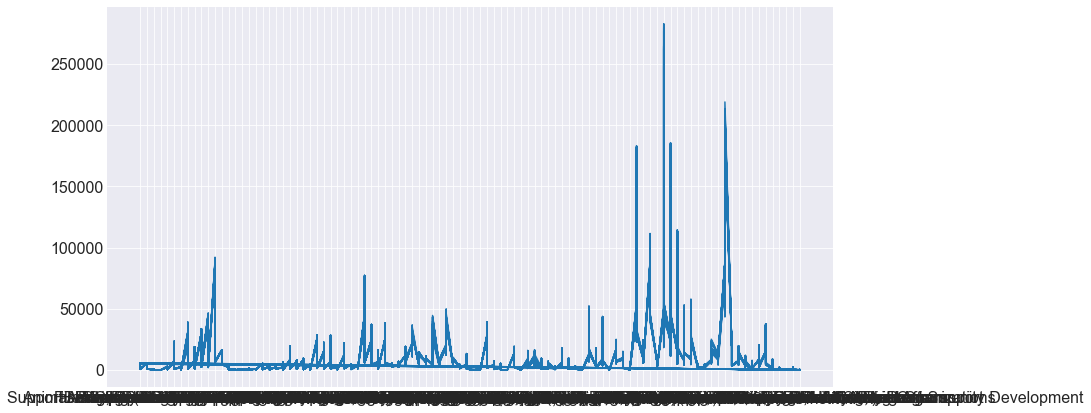

In [95]:
# plot
fig, ax = plt.subplots()

ax.plot(df_education.industry_label,df_education.Emp)

plt.show()